In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multivariate_t as mvt
from utils import MPCTrajectory
from utils import systematic_resampling, stratified_resampling, residual_resampling, CarTrajectoryLinear, CarTrajectoryNonLinear
from tqdm import tqdm
from utils import PF
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection
from scipy.interpolate import interp1d

In [2]:
trajectory = MPCTrajectory(savepath='output/trajectory_L1.npy')
states, measurements = trajectory.get_data()

In [26]:
np.random.seed(4)
a = np.abs(np.random.randn(100))
a /= np.sum(a)

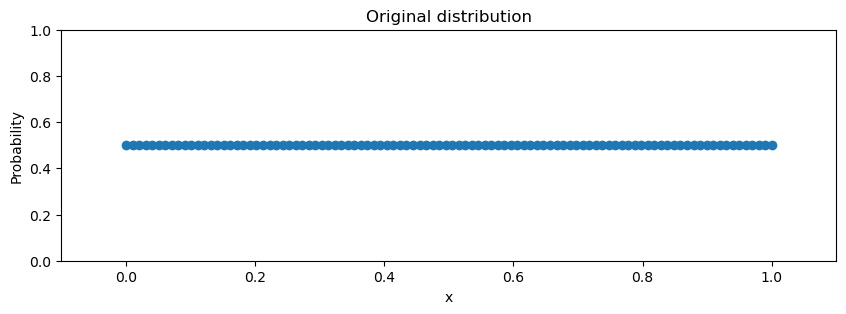

In [27]:
x = np.linspace(0, 1, len(a))
# Plot x as vlines
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x, np.repeat(0.5, len(a)), 'o')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Original distribution')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 1)
plt.show()

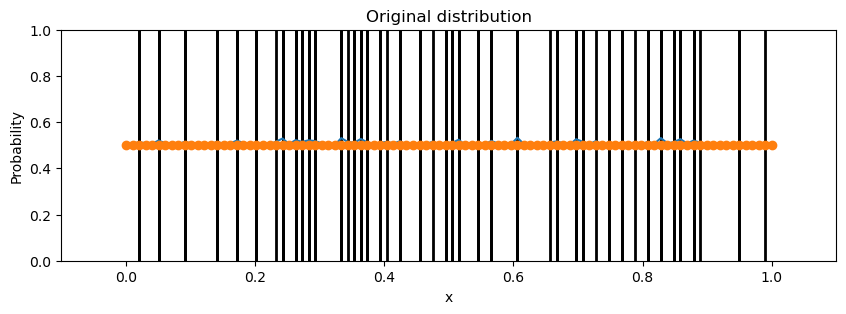

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x, a + 0.5)
ax.plot(x, np.repeat(0.5, len(a)), 'o')
ax.vlines(x[residual_resampling(a)], 0, 1, color='k', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Original distribution')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 1)
plt.show()

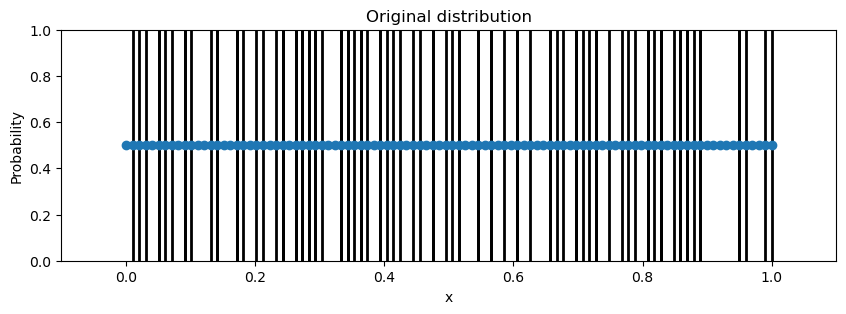

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x, np.repeat(0.5, len(a)), 'o')
ax.vlines(x[stratified_resampling(a)], 0, 1, color='k', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Original distribution')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 1)
plt.show()

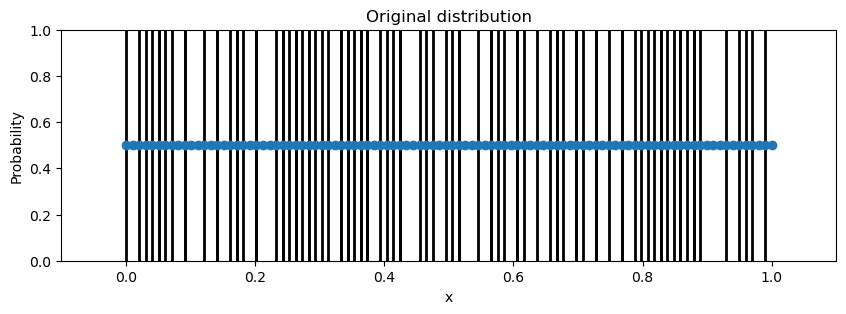

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x, np.repeat(0.5, len(a)), 'o')
ax.vlines(x[systematic_resampling(a)], 0, 1, color='k', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
ax.set_title('Original distribution')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0, 1)
plt.show()